In [63]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

iris = datasets.load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

%matplotlib inline

In [56]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', 
                   alpha=1.0, linewidth=1, marker='o',
                   s=55, label="test set")

In [57]:
scale = StandardScaler()

X_train_std = scale.fit_transform(X_train)
X_test_std = scale.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [58]:
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(105, 2) (105,) (45, 2) (45,)


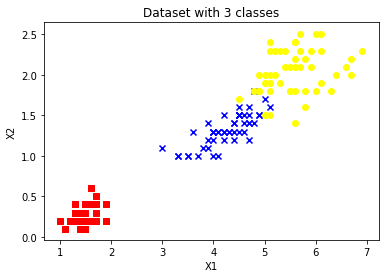

In [59]:
#plotting original data
markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'yellow')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Dataset with 3 classes")
plt.show()

Misclassfied samples: 2


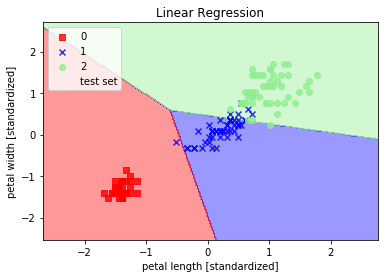

In [62]:
lr = LogisticRegression()
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print('Misclassfied samples: %d' % (y_test != y_pred).sum())
#print ('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.title("Linear Regression")
plt.show()

Misclassfied samples: 1


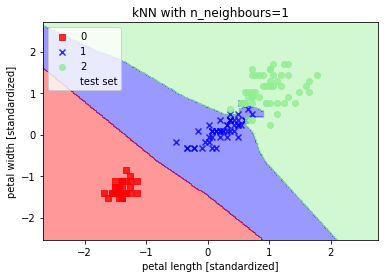

In [44]:
lr = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print('Misclassfied samples: %d' % (y_test != y_pred).sum())
#print ('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.title("kNN with n_neighbours=1")
plt.show()

Misclassfied samples: 0


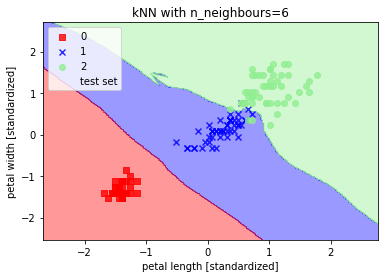

In [45]:
lr = KNeighborsClassifier(n_neighbors=6, n_jobs=-1)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print('Misclassfied samples: %d' % (y_test != y_pred).sum())
#print ('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.title("kNN with n_neighbours=6")
plt.show()

Misclassfied samples: 0


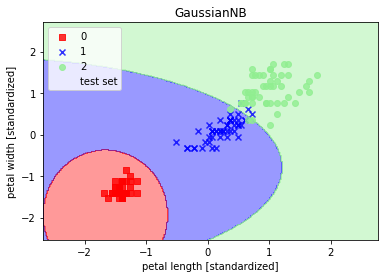

In [46]:
lr = GaussianNB()
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print('Misclassfied samples: %d' % (y_test != y_pred).sum())
#print ('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.title("GaussianNB")
plt.show()

Misclassfied samples: 0


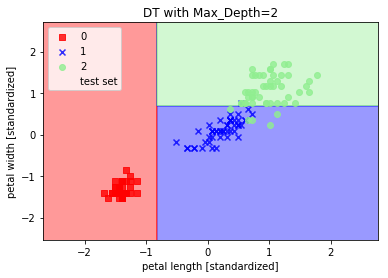

In [52]:
lr = DecisionTreeClassifier(max_depth=2)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print('Misclassfied samples: %d' % (y_test != y_pred).sum())
#print ('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.title("DT with Max_Depth=2")
plt.show()

Misclassfied samples: 13


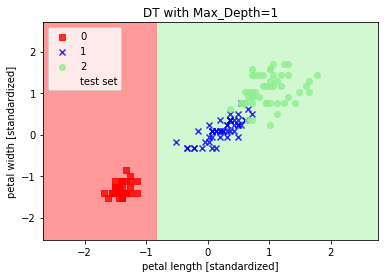

In [54]:
lr = DecisionTreeClassifier(max_depth=1)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print('Misclassfied samples: %d' % (y_test != y_pred).sum())
#print ('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.title("DT with Max_Depth=1")
plt.show()

Misclassfied samples: 0


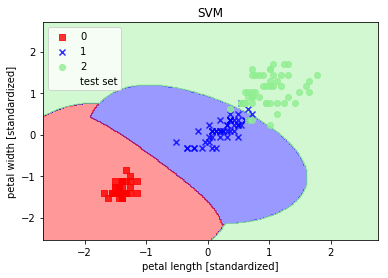

In [66]:
lr = SVC(C=1)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print('Misclassfied samples: %d' % (y_test != y_pred).sum())
#print ('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.title("SVM")
plt.show()